# Exercise 1
Load the dataset WA_Fn-UseC_-Telco-Customer-Churn.csv provided. 
Perform transformations on it so it is prepared to build a model 
(scaling the numerical data and the cathegorical features transformed in numerical integer labels.


In [74]:
import pandas as pd
import numpy as np
from sklearn import preprocessing


df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

num_data =  df.select_dtypes(include=[np.number]).columns.tolist()
scaler = preprocessing.StandardScaler()
df[num_data] = scaler.fit_transform(df[num_data])

categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
le = preprocessing.OrdinalEncoder()
df[categorical_features] = le.fit_transform(df[categorical_features])
    
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,-0.439916,1.0,0.0,-1.277445,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.160323,2505.0,0.0
1,3962.0,1.0,-0.439916,0.0,0.0,0.066327,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,-0.259629,1466.0,0.0
2,2564.0,1.0,-0.439916,0.0,0.0,-1.236724,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.362660,157.0,1.0
3,5535.0,1.0,-0.439916,0.0,0.0,0.514251,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,-0.746535,1400.0,0.0
4,6511.0,0.0,-0.439916,0.0,0.0,-1.236724,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.197365,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,-0.439916,1.0,1.0,-0.340876,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,0.665992,1597.0,0.0
7039,1525.0,0.0,-0.439916,1.0,1.0,1.613701,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.277533,5698.0,0.0
7040,3367.0,0.0,-0.439916,1.0,1.0,-0.870241,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.168632,2994.0,0.0
7041,5934.0,1.0,2.273159,1.0,0.0,-1.155283,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.320338,2660.0,1.0


# Exercise 2

Download from https://www.kaggle.com/ the regression dataset: Student Study Hours. 
        Create a model and make 3 predictions. 
        Make some nice graphics to depict the model (training set, test set, predictions). 

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.94
9.941678339488096 * x + 1.932204253151646 = y
Our model predicted that we get a 2.5 after 26.786400101871884 hours 
Our model predicted that we get a 5.0 after 51.64059595059212 hours
Our model predicted that we get a 10.0 after 101.34898764803259 hours


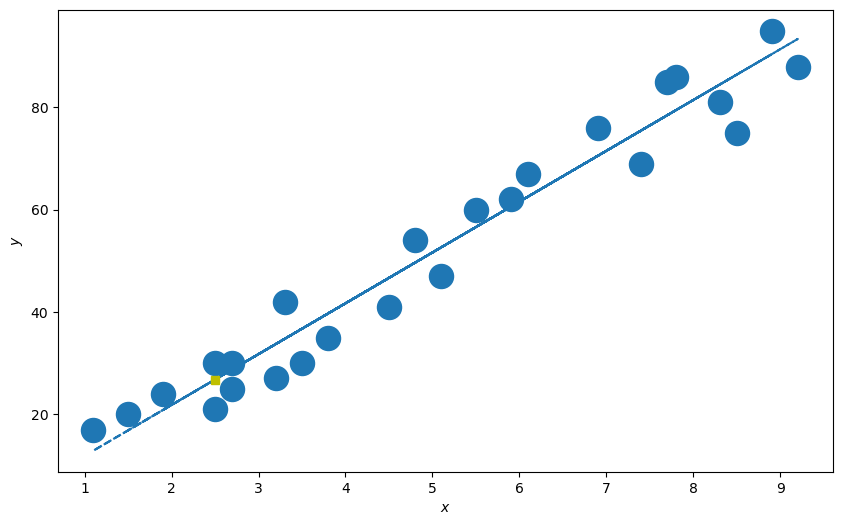

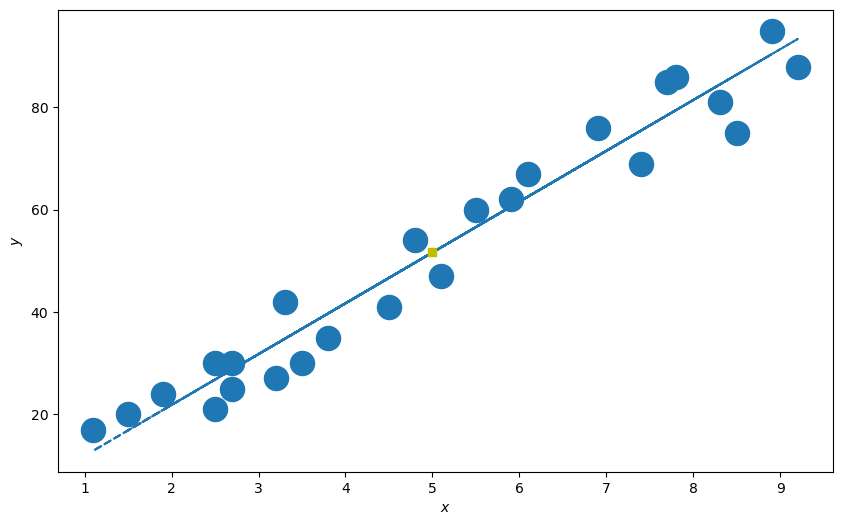

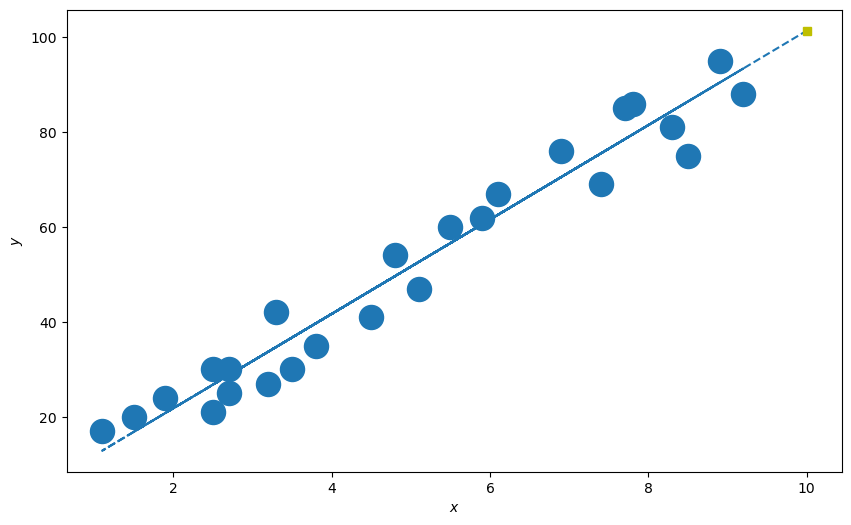

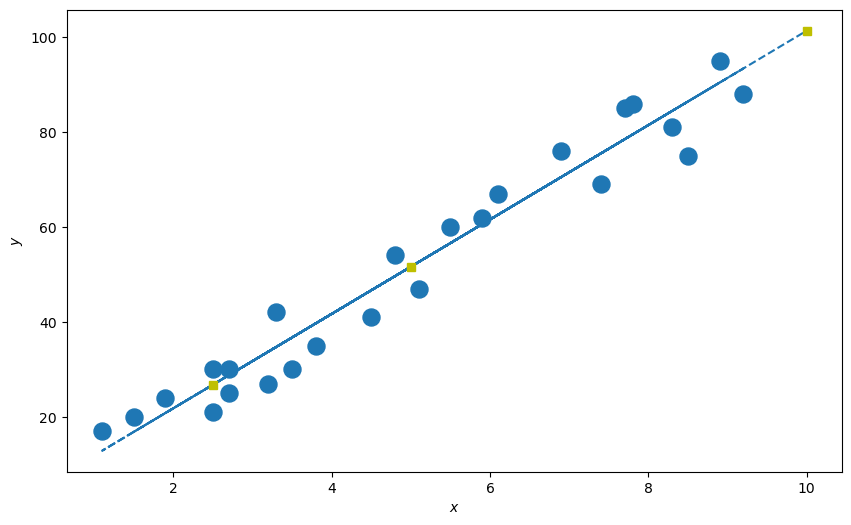

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("student_hours_vs_marks.csv")
print(df.head())

X = np.array(df['Hours'])
y = np.array(df['Scores'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# reshape the X list in order to have a two dimensional array
# since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# create a linear regression model and fit the model to the training data
model = LinearRegression().fit(X_train, y_train)

print(f"Linear Regression-Training set score: {model.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {model.score(X_test, y_test):.2f}")


a = model.coef_[0] # we ahve one feature with index 0
b = model.intercept_ # a scalar
print(a, "* x +", b, "= y")

pred = model.predict([[2.5]])
print('Our model predicted that we get a 2.5 after {} hours '.format(pred[0]))
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))
x = X.T
best_fit = b + a * (np.append(x, [2.5]))
ax_scat.scatter(x, y, s=300, label='Training Data')
ax_scat.plot(np.append(x,[2.5]), best_fit, ls='--', label='Best Fit Line')
ax_scat.plot([2.5],pred, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$');


pred = model.predict([[5.0]])
print('Our model predicted that we get a 5.0 after {} hours'.format(pred[0]))
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))
x = X.T
best_fit = b + a * (np.append(x, [5.0]))
ax_scat.scatter(x, y, s=300, label='Training Data')
ax_scat.plot(np.append(x,[5.0]), best_fit, ls='--', label='Best Fit Line')
ax_scat.plot([5.0],pred, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$');


pred = model.predict([[10.0]])
print('Our model predicted that we get a 10.0 after {} hours'.format(pred[0]))
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))
x = X.T
best_fit = b + a * (np.append(x, [10.0]))
ax_scat.scatter(x, y, s=300, label='Training Data')
ax_scat.plot(np.append(x,[10.0]), best_fit, ls='--', label='Best Fit Line')
ax_scat.plot([10.0],pred, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$');


X_pred = [[2.5], [5.0], [10.0]]
y_pred = model.predict(X_new)


pred = model.predict(X_pred)
fig_scat, ax_scat = plt.subplots(1, 1, figsize=(10,6))
x = X.T
best_fit = b + a * (np.append(x, X_pred))
ax_scat.scatter(x, y, s=150, label='Training Data')
ax_scat.plot(np.append(x, X_pred), best_fit, ls='--', label='Best Fit Line')
ax_scat.plot(X_pred, pred, "ys", label="LinearRegression")
ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$');

# Exercise 3

For your build previous model perform all three regularizations presented here.  

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
import numpy as np
import matplotlib.pyplot as plt


# load the dataset into a pandas DataFrame
df = pd.read_csv("student_hours_vs_marks.csv")
print(df.head())

# split the dataset into training and testing sets
X = np.array(df['Hours'])
y = np.array(df['Scores'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# reshape the X list in order to have a two dimensional array
# since we have only one feature the reshape looks like below: 
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

print(f"Linear Regression-Training set score: {model.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {model.score(X_test, y_test):.2f}")


ridge = Ridge(alpha=0.7).fit(X_train, y_train)

print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")


lasso = Lasso(alpha=1.0).fit(X_train, y_train)

print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")


elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)

print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
Linear Regression-Training set score: 0.95
Linear Regression-Test set score: 0.94
Ridge Regression-Training set score: 0.95
Ridge Regression-Test set score: 0.94
Lasso Regression-Training set score: 0.95
Lasso Regression-Test set score: 0.94
Elastic Net-Training set score: 0.95
Elastic Net-Test set score: 0.94
